<a href="https://colab.research.google.com/github/miguelorduna360-alt/Debt/blob/main/GlobalDebtDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question:

> To what extent was the economic performance of the United States throughout the 2008 recession an indicator of change in terms of total private debt, household debt and NonFinancial Corporation Debt for European and Asian economies?



In [58]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

Data Exploration: DEBT

This is where I ran the url for the datases via github as a csv file, then I called debt_df to view the datasets fully for any NaN values, I have the USA alomg with three European countries and one Asian Country.

In [37]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/USADataSet%20-%20GlobalDebtDatabaseForUS.xlsx%20-%20Data%20(2).csv'
debtUSA_df = pd.read_csv(url)
debtUSA_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,75.83,55.31,25.48,24.80,50.34,30.51,83.13,78.20,301.78
1,1951,72.69,53.66,24.52,23.91,48.17,29.75,72.96,68.20,348.99
2,1952,88.24,56.56,26.60,25.98,61.64,30.58,72.53,66.34,368.03
3,1953,88.05,58.02,28.43,27.79,59.62,30.22,71.75,64.60,389.15
4,1954,106.06,62.57,31.54,30.86,74.52,31.71,73.57,64.96,390.28
...,...,...,...,...,...,...,...,...,...,...
69,2019,229.96,153.39,77.05,75.11,152.91,78.28,108.71,92.39,21539.98
70,2020,238.75,164.80,80.48,78.46,158.28,86.33,132.93,116.88,21354.13
71,2021,229.76,160.50,79.51,77.75,150.25,82.76,125.25,111.90,23681.18
72,2022,227.77,156.12,76.63,75.47,151.14,80.65,119.52,107.54,26006.90


In [38]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/UK%20Dataset%20-%20GlobalDebtDatabaseForUK.xlsx%20-%20Data.csv'
debtUK_df = pd.read_csv(url)
debtUK_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,179.90,NaN,14.34
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,162.18,NaN,15.98
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,150.15,NaN,17.24
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,140.87,NaN,18.49
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,135.84,NaN,19.57
...,...,...,...,...,...,...,...,...,...,...
69,2019,200.10,156.99,91.00,85.70,109.10,71.28,85.66,84.69,2233.92
70,2020,226.79,176.68,99.39,92.91,127.40,83.78,105.84,104.85,2103.49
71,2021,199.81,163.85,92.82,87.94,106.99,75.91,105.14,104.31,2285.40
72,2022,170.77,148.45,87.31,82.46,83.46,65.99,99.62,99.01,2526.43


In [39]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/CA%20DataSet%20-%20GlobalDebtDatabaseForUS.xlsx%20-%20Data%20(1).csv'
debtCA_df = pd.read_csv(url)
debtCA_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,87.75,NaN,19.90
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,76.52,NaN,23.19
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,70.05,NaN,26.19
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,67.19,NaN,27.47
4,1954,NaN,66.96,NaN,NaN,NaN,NaN,68.28,NaN,27.61
...,...,...,...,...,...,...,...,...,...,...
69,2019,278.19,221.17,106.06,103.52,172.14,117.64,90.21,39.09,2313.56
70,2020,305.44,244.99,115.03,112.18,190.41,132.81,118.20,60.61,2220.53
71,2021,285.54,232.85,109.15,106.43,176.39,126.42,113.48,56.60,2517.12
72,2022,267.97,217.22,103.96,101.55,164.01,115.67,107.37,50.51,2813.29


In [40]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/JP%20Dataset%20-%20GlobalDebtDatabaseForUS.xlsx%20-%20Data%20(2).csv'
debtJP_df = pd.read_csv(url)
debtJP_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4167.77
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5772.23
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6516.18
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7354.44
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8166.46
...,...,...,...,...,...,...,...,...,...,...
69,2019,205.88,164.33,64.79,62.54,141.08,101.79,236.38,197.46,557910.90
70,2020,222.39,183.25,69.52,67.49,152.87,115.76,258.37,205.56,539648.80
71,2021,224.51,183.62,69.49,67.65,155.02,115.97,253.65,214.10,553150.80
72,2022,229.43,185.53,70.00,67.85,159.44,117.68,256.30,214.26,561751.30


In [41]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/DebtData/refs/heads/main/ES%20Dataset%20-%20GlobalDebtDatabaseForUS.xlsx%20-%20Data%20(1).csv'
debtES_df = pd.read_csv(url)
debtES_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.05,1.66
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.81,2.09
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.76,2.16
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.15,2.11
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.80,2.45
...,...,...,...,...,...,...,...,...,...,...
69,2019,195.47,148.68,60.43,56.44,135.04,92.24,97.58,87.40,1253.71
70,2020,217.80,168.68,66.45,62.02,151.34,106.66,119.18,106.85,1129.21
71,2021,205.26,159.17,61.50,57.00,143.77,102.17,115.59,103.62,1235.47
72,2022,184.87,141.56,55.65,51.22,129.22,90.33,109.40,98.93,1373.63


In the first line of code I reorginzed the values, from numerical Strings to Floats, next I also did reorginzation with the NaN values, giving them 0. After That I dropped the two columns that had no data, and kept inplace the ones with values, otherwise known as True. Then I

In [54]:
debtUSA_df = debtUSA_df.apply(pd.to_numeric, errors='coerce')
debtUSA_df.fillna(0, inplace=True)


debtUK_df = debtUK_df.apply(pd.to_numeric, errors='coerce')
debtUK_df.fillna(0, inplace=True)


debtCA_df = debtCA_df.apply(pd.to_numeric, errors='coerce')
debtCA_df.fillna(0, inplace=True)


debtJP_df = debtJP_df.apply(pd.to_numeric, errors='coerce')
debtJP_df.fillna(0, inplace=True)


debtES_df = debtES_df.apply(pd.to_numeric, errors='coerce')
debtES_df.fillna(0, inplace=True)

Here I have made a new column for Countries in their Initial Form as well as combining every dataset from every country into a Combinded version with the countries I chose. Then I filtered with setting conditionals and then have a finalized, perfect for the 2008 recession timeline.

In [55]:
debtUSA_df['Country'] = 'USA'
debtUK_df['Country'] = 'UK'
debtCA_df['Country'] = 'CA'
debtJP_df['Country'] = 'JP'
debtES_df['Country'] = 'ES'

combinded_df = pd.concat([debtUSA_df, debtUK_df, debtCA_df, debtJP_df, debtES_df])

filteredDebt_df = combinded_df[(combinded_df['Year'] >= 2007) & (combinded_df['Year'] <= 2009)]
filteredDebt_df

,Year,"Total private debt, all instruments","Total private debt, loans and debt securities","Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product,Country
57,2007,230.98,170.86,100.59,98.74,130.38,72.12,66.25,45.17,14474.25,USA
58,2008,235.93,170.76,98.15,96.15,137.79,74.61,74.97,53.41,14769.85,USA
59,2009,235.52,169.54,99.24,96.96,136.29,72.59,87.80,64.97,14478.05,USA
57,2007,227.38,175.99,105.68,94.75,121.70,81.24,43.17,42.19,1544.64,UK
58,2008,240.96,185.28,104.86,95.29,136.10,89.99,50.83,49.95,1593.60,UK
59,2009,247.24,185.22,107.46,98.07,139.77,87.15,64.92,64.05,1548.80,UK
57,2007,203.52,161.85,82.90,80.73,120.62,81.12,67.18,29.90,1577.66,CA
58,2008,216.28,167.44,85.89,83.47,130.39,83.97,70.36,36.25,1657.04,CA
59,2009,231.91,183.24,97.67,94.91,134.23,88.33,81.80,43.67,1571.33,CA
57,2007,204.36,158.77,62.49,60.00,141.87,98.77,172.95,134.08,539281.70,JP


Then I will have made a filtered version of the DataFrame for the USA to compare with the others on the filteredDebt Df area. The filtering is during the time of the 2008 Recession, The reason for 2007 to be included is due to it starting in December 2007.

In [56]:
filtered_debtUSA_df = debtUSA_df[(debtUSA_df['Year'] >= 2007) & (debtUSA_df['Year'] <= 2009)]

I will have displayed the USA version of the Debt sectors I have chosen for my research question. These will be based in 2007 to 2009, during the time of the Recession, to see how the USA changed throughout the Recession.

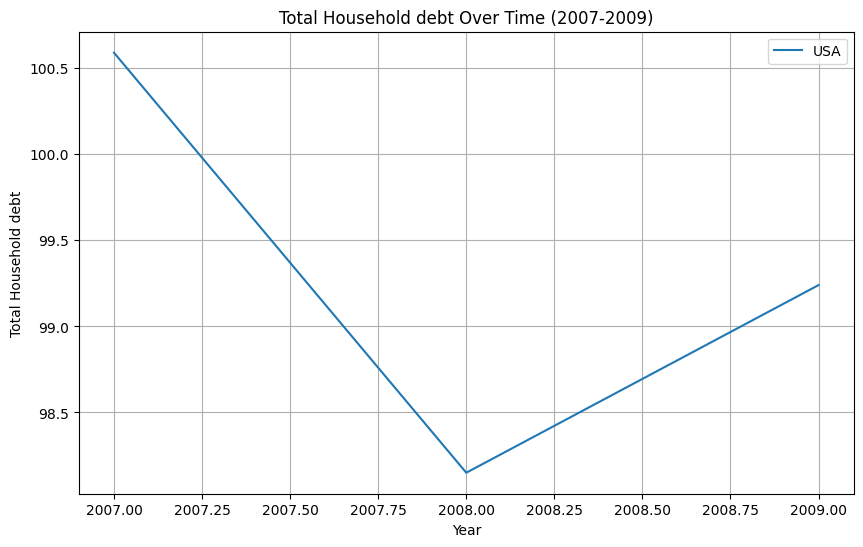

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_debtUSA_df['Year'], filtered_debtUSA_df['Household debt, all instruments'], label = 'USA')
plt.xlabel('Year')
plt.ylabel('Total Household debt')
plt.title('Total Household debt Over Time (2007-2009)')
plt.legend()
plt.grid(True)
plt.show()

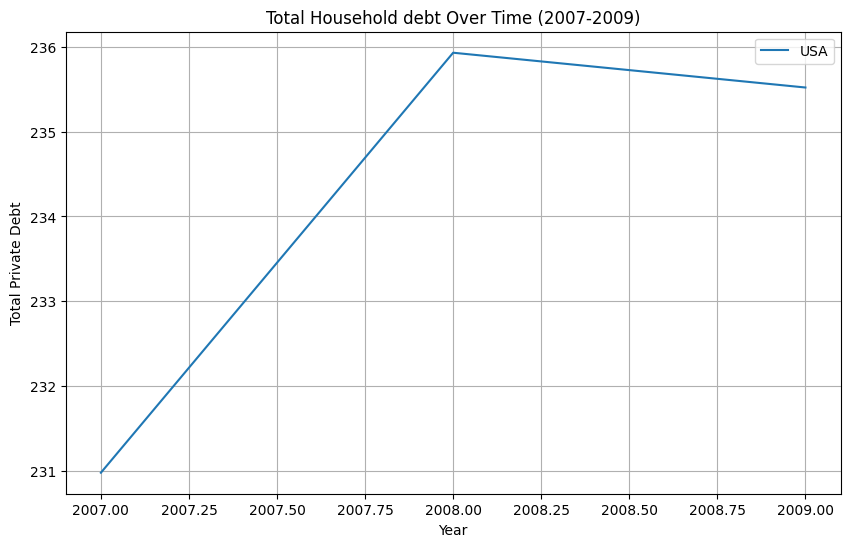

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_debtUSA_df['Year'], filtered_debtUSA_df['Total private debt, all instruments'], label = 'USA')
plt.xlabel('Year')
plt.ylabel('Total Private Debt')
plt.title('Total Household debt Over Time (2007-2009)')
plt.legend()
plt.grid(True)
plt.show()

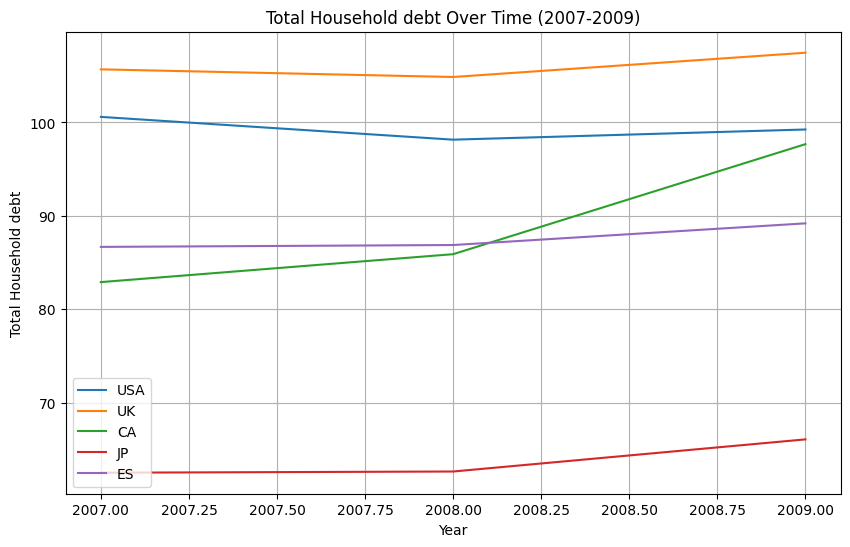

In [49]:
plt.figure(figsize=(10, 6))

# Plot data for each country
for country in filteredDebt_df['Country'].unique():
    country_data = filteredDebt_df[filteredDebt_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Household debt, all instruments'], label=country)


plt.xlabel('Year')
plt.ylabel('Total Household debt')
plt.title('Total Household debt Over Time (2007-2009)')
plt.legend()
plt.grid(True)
plt.show()

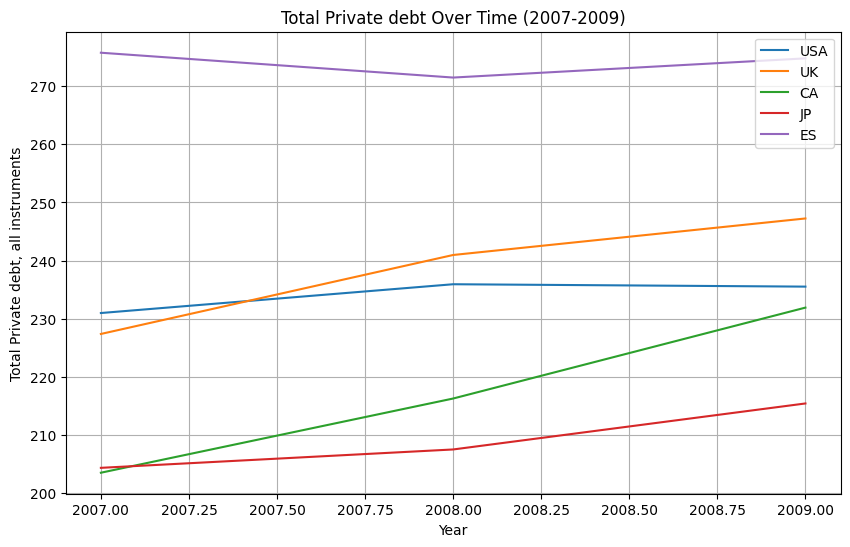

In [52]:
plt.figure(figsize=(10, 6))

# Plot data for each country
for country in filteredDebt_df['Country'].unique():
    country_data = filteredDebt_df[filteredDebt_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total private debt, all instruments'], label=country)


plt.xlabel('Year')
plt.ylabel('Total Private debt, all instruments')
plt.title('Total Private debt Over Time (2007-2009)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
filteredDebt_df